# 4.10 Final Task, Part 1

## Import

In [13]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [14]:
# Import dataframe

path = r'C:\Users\lefev\Documents\Data Analytics Course\Instacart Basket Analysis'

In [15]:
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_merged.pkl'))

## Question 2. Security Implications

In [17]:
# Check columns and data types

df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,reordered,product_name,aisle_id,department_id,...,frequency_flag,gender,state,age,date_joined,number_of_children,fam_status,income,name,_merge
0,431534,1,5,4,15,28.0,1.0,Soda,77,7,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Linda Nguyen,both
1,431534,1,5,4,15,28.0,1.0,Original Beef Jerky,23,19,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Linda Nguyen,both
2,431534,1,5,4,15,28.0,1.0,Pistachios,117,19,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Linda Nguyen,both
3,431534,1,5,4,15,28.0,1.0,Organic String Cheese,21,16,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Linda Nguyen,both
4,431534,1,5,4,15,28.0,0.0,Organic Fuji Apples,24,4,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Linda Nguyen,both


In [18]:
# Drop unessesary columns 

df_merged = df_merged.drop(['reordered', 'aisle_id', '_merge'], axis=1)

In [19]:
# Double check all columns 

print(df_merged.columns.tolist())

['order_id', 'user_id', 'order_number', 'orders_day_of_week', 'order_time', 'days_since_prior_order', 'product_name', 'department_id', 'prices', 'price_range_loc', 'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price', 'spending_flag', 'median_days', 'frequency_flag', 'gender', 'state', 'age', 'date_joined', 'number_of_children', 'fam_status', 'income', 'name']


In [20]:
# Drop more unessesary columns

df_merged = df_merged.drop(['price_range_loc', 'median_days'], axis=1)

## Answer to security implications - There are several reasons to be mindful fo PII. We have sensative data on people's names, gender, age, state, income, and number of dependents. It would need to be checked with the stakeholder on how to properly manage the data. 

## Question 3. Customer spending based on region

In [23]:
# Create a region column from the state information 
# Frist create a dictionary mapping states to their regions 

us_regions = {
    # Northeast
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
    'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',
    
    # Midwest
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest',
    'Ohio': 'Midwest', 'Wisconsin': 'Midwest', 'Iowa': 'Midwest',
    'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest',
    'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest',
    
    # South
    'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South',
    'Maryland': 'South', 'North Carolina': 'South', 'South Carolina': 'South',
    'Virginia': 'South', 'West Virginia': 'South', 'Alabama': 'South',
    'Kentucky': 'South', 'Mississippi': 'South', 'Tennessee': 'South',
    'Arkansas': 'South', 'Louisiana': 'South', 'Oklahoma': 'South', 'Texas': 'South',
    
    # West
    'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West', 'Montana': 'West',
    'Nevada': 'West', 'New Mexico': 'West', 'Utah': 'West', 'Wyoming': 'West',
    'Alaska': 'West', 'California': 'West', 'Hawaii': 'West', 'Oregon': 'West',
    'Washington': 'West'
}



In [24]:
# Create the new column using map

df_merged['region'] = df_merged['state'].map(us_regions)

In [25]:
# Check the new column 

df_merged[['state', 'region']].head()

,state,region
0,Alabama,South
1,Alabama,South
2,Alabama,South
3,Alabama,South
4,Alabama,South


<Axes: xlabel='region', ylabel='count'>

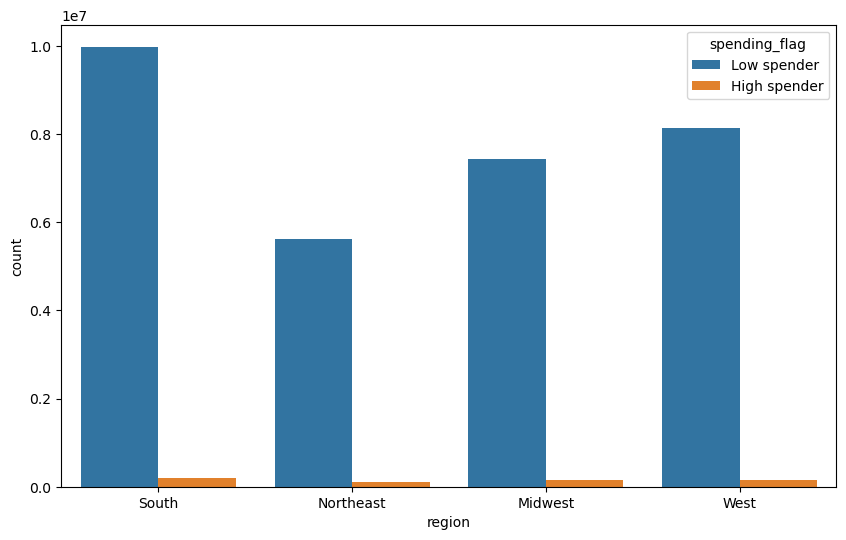

In [128]:
# Determine the spending habits between US regions by creating a bar chart

flag_fig = plt.figure(figsize=(10, 6))
sns.countplot(data=df_merged, x='region', hue='spending_flag')

## We see the South is the highest spending region. The northeast is the least. And there seems to be little difference in the number of high spenders accross the regions. 

## Question 4. Create and exclusion flag for low-activity customers (less than 5 orders) and export 

In [29]:
# Check for what column that shows number of orders

df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_name,department_id,prices,busiest_days,...,frequency_flag,gender,state,age,date_joined,number_of_children,fam_status,income,name,region
0,431534,1,5,4,15,28.0,Soda,7,9.0,Least busy days,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Linda Nguyen,South
1,431534,1,5,4,15,28.0,Original Beef Jerky,19,4.4,Least busy days,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Linda Nguyen,South
2,431534,1,5,4,15,28.0,Pistachios,19,3.0,Least busy days,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Linda Nguyen,South
3,431534,1,5,4,15,28.0,Organic String Cheese,16,8.6,Least busy days,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Linda Nguyen,South
4,431534,1,5,4,15,28.0,Organic Fuji Apples,4,2.7,Least busy days,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,Linda Nguyen,South


In [30]:
df_merged.shape

(32404859, 25)

In [31]:
# Use the groupby() and transform() functions to create the exclusion flag

df_merged['exclusion_flag'] = np.where(df_merged.groupby('user_id')['order_id'].transform('count') < 5, 'Exclude', 'Include')

In [32]:
# Check value counts of exclusion flag

print(df_merged['exclusion_flag'].value_counts(dropna=False))

exclusion_flag
Include    32401975
Exclude        2884
Name: count, dtype: int64


In [33]:
# Create df of exclusion flag to export

df_filtered = df_merged[df_merged['exclusion_flag'] == 'Exclude']

In [34]:
# Check df_filtered 

df_filtered.shape

(2884, 26)

In [35]:
# Exlude the exclusion_flag form df merged by saying "keep only the rows where exclusion_flag is 'Include'"

df_merged = df_merged.loc[df_merged['exclusion_flag'] == 'Include']

In [36]:
# Check if rows changed 

df_merged.shape

(32401975, 26)

In [37]:
# Export exclusion flag as requested

df_filtered.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'filtered_exclusion.pkl'))

## Question 5. Create a profiling variable based on age, income, certain goods, and number of dependents. 

### First create a 70/30 sample to help with memory and then basic demographic catagories

In [42]:
# Create the 70/30 split with seed

np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [44]:
# Store the splits

big = df_merged[dev]
small = df_merged[~dev]

### Now creating profiling

In [49]:
# Use .loc for all new columns and big sample to create profiles

big.loc[:, 'age_category'] = pd.cut(
    big['age'],
    bins=[0, 25, 35, 50, 65, 100],
    labels=['Young Adult', 'Early Career', 'Mid Career', 'Late Career', 'Senior']
)

big.loc[:, 'income_category'] = pd.cut(
    big['income'],
    bins=[0, 30000, 60000, 100000, float('inf')],
    labels=['Budget', 'Middle Income', 'Upper Middle', 'Affluent']
)

big.loc[:, 'family_status'] = np.where(
    big['number_of_children'] == 0, 'No Children',
    np.where(big['number_of_children'] == 1, 'Single Child',
            'Multiple Children')
)

In [51]:
# Create conditions for profiles

conditions = [
    # Young Singles
    (big['age_category'].isin(['Young Adult', 'Early Career']) & 
     (big['family_status'] == 'No Children')),
    
    # Young Parents
    (big['age_category'].isin(['Early Career', 'Mid Career']) & 
     (big['family_status'] != 'No Children')),
    
    # Empty Nesters
    (big['age_category'] == 'Senior') & 
    (big['family_status'] == 'No Children'),
    
    # Established Parents
    (big['age_category'].isin(['Mid Career', 'Late Career']) & 
     (big['family_status'] != 'No Children'))
]

choices = ['Young Single', 'Young Parent', 'Empty Nester', 'Established Parent']


In [53]:
# Create the customer_profile column 

big.loc[:, 'customer_profile'] = np.select(conditions, choices, default='Other')

C:\Users\lefev\AppData\Local\Temp\ipykernel_7248\2813475423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big.loc[:, 'customer_profile'] = np.select(conditions, choices, default='Other')


In [59]:
# Create detailed profile

big.loc[:, 'detailed_profile'] = (
    big['customer_profile'].astype(str) + ' - ' + 
    big['income_category'].astype(str)
)

C:\Users\lefev\AppData\Local\Temp\ipykernel_7248\1309885157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big.loc[:, 'detailed_profile'] = (


In [63]:
# Check 70/30 split worked correctly

print("\nDataset Sizes:")
print(f"Big dataset (70%): {len(big)} rows ({len(big)/len(df_merged):.1%})")
print(f"Small dataset (30%): {len(small)} rows ({len(small)/len(df_merged):.1%})")


Dataset Sizes:
Big dataset (70%): 22681708 rows (70.0%)
Small dataset (30%): 9720267 rows (30.0%)


In [65]:
# Check the distribution of customer profiles as percentages 

print("\nCustomer Profile Distribution:")
print(big['customer_profile'].value_counts(normalize=True).round(3) * 100, "%")


Customer Profile Distribution:
customer_profile
Other                 40.0
Young Parent          29.5
Established Parent    17.3
Young Single           7.0
Empty Nester           6.2
Name: proportion, dtype: float64 %


In [67]:
# Check the top 10 detailed profiles with their counts

print("\nDetailed Profile Distribution (Top 10):")
print(big['detailed_profile'].value_counts().head(10))


Detailed Profile Distribution (Top 10):
detailed_profile
Other - Affluent                     4612593
Young Parent - Upper Middle          3080899
Other - Upper Middle                 2882806
Established Parent - Affluent        2717906
Young Parent - Affluent              2007597
Young Parent - Middle Income         1532664
Other - Middle Income                1529433
Young Single - Upper Middle          1019853
Empty Nester - Affluent               978201
Established Parent - Upper Middle     749875
Name: count, dtype: int64


In [69]:
# Show a sample of how individual customers were categorized 

print("\nExample Profiles (First 5 rows):")
print(big[['age_category', 'income_category', 'family_status', 
          'customer_profile', 'detailed_profile']].head())



Example Profiles (First 5 rows):
   age_category income_category      family_status customer_profile  \
1  Early Career   Middle Income  Multiple Children     Young Parent   
4  Early Career   Middle Income  Multiple Children     Young Parent   
5  Early Career   Middle Income  Multiple Children     Young Parent   
7  Early Career   Middle Income  Multiple Children     Young Parent   
8  Early Career   Middle Income  Multiple Children     Young Parent   

               detailed_profile  
1  Young Parent - Middle Income  
4  Young Parent - Middle Income  
5  Young Parent - Middle Income  
7  Young Parent - Middle Income  
8  Young Parent - Middle Income  


## Question 6.  Create a visualization to show the distribution of profiles

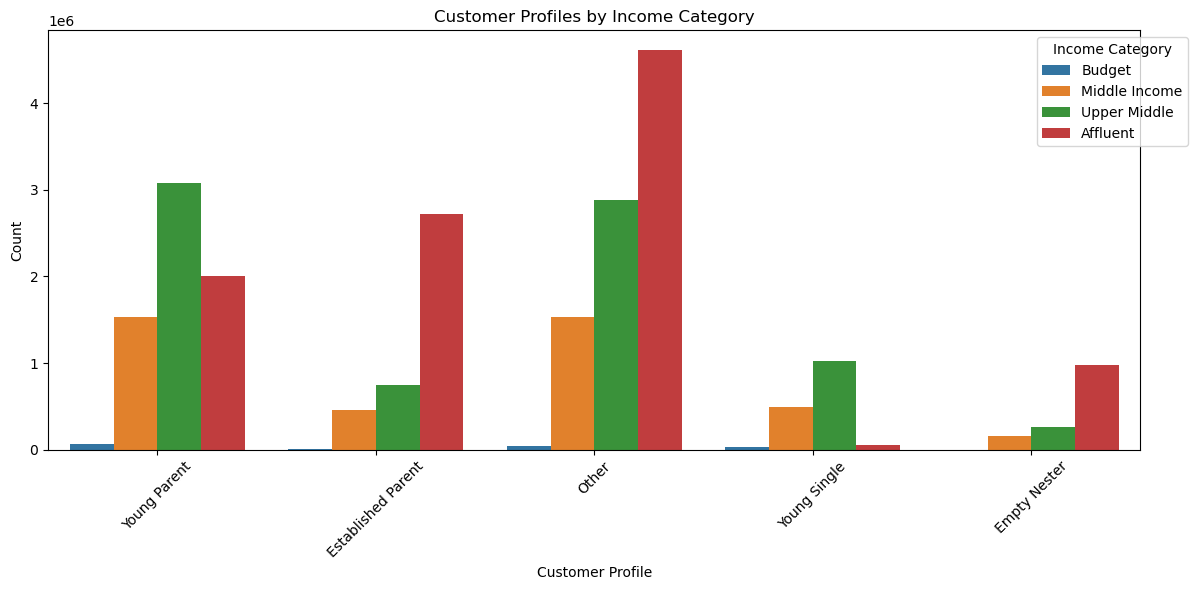

In [123]:
# Create grouped bar chart showing customer profiles with income category

fig = plt.figure(figsize=(12, 6))
sns.countplot(data=big, 
              x='customer_profile', 
              hue='income_category')

plt.title('Customer Profiles by Income Category')
plt.xlabel('Customer Profile')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Key for the customer profiles

### 1. Young Single
### Age: Young Adult (0-25) or Early Career (26-35)
### Family Status: No Children
### These customers are in their early adult years without children


### 2. Young Parent
### Age: Early Career (26-35) or Mid Career (36-50)
### Family Status: Has Children (either Single Child or Multiple Children)
### These are relatively younger customers with children


### 3. Established Parent
### Age: Mid Career (36-50) or Late Career (51-65)
### Family Status: Has Children (either Single Child or Multiple Children)
### These are more mature customers with children


### 4. Empty Nester
### Age: Senior (66-100)
### Family Status: No Children
### These are senior customers without children at home


### 5. Other
### Any combination that doesn't fit the above categories

## Question 7. Aggreate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [78]:
# Calculate statistics on customer profile 

profile_stats = big.groupby('customer_profile').agg({
    'days_since_prior_order': ['max', 'mean', 'min'],  # frequency of orders
    'prices': ['max', 'mean', 'min']  # expenditure
}).round(2)

In [80]:
profile_stats.head()

days_since_prior_order             prices           
                                      max   mean  min    max  mean  min
customer_profile                                                       
Empty Nester                         30.0  11.08  0.0   25.0  7.80  1.0
Established Parent                   30.0  11.21  0.0   25.0  7.79  1.0
Other                                30.0  11.06  0.0   25.0  7.79  1.0
Young Parent                         30.0  11.10  0.0   25.0  7.79  1.0
Young Single                         30.0  11.18  0.0   25.0  7.78  1.0

## Question 8. Compare customer profiles with regions and departments

In [84]:
# Create a cross-tab of profiles and regions

profile_region = pd.crosstab(big['customer_profile'], 
                            big['region'], 
                            normalize='index') * 100

In [86]:
print("\nCustomer Profile Distribution by Region (%):")
print(profile_region.round(2))


Customer Profile Distribution by Region (%):
region              Midwest  Northeast  South   West
customer_profile                                    
Empty Nester          24.03      18.99  30.81  26.18
Established Parent    23.85      18.14  31.79  26.22
Other                 24.00      17.69  32.14  26.17
Young Parent          24.03      17.97  31.98  26.02
Young Single          22.91      18.55  33.15  25.39


In [92]:
# Department naming did not save from 4.4 exericse, will map the names now

dept_names = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}

In [94]:
# Create new column with department names

big['department_name'] = big['department_id'].map(dept_names)

C:\Users\lefev\AppData\Local\Temp\ipykernel_7248\740955484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big['department_name'] = big['department_id'].map(dept_names)


In [96]:
# Print cross-tab with dpeartment names

profile_dept = pd.crosstab(big['customer_profile'], 
                          big['department_name'], 
                          normalize='index') * 100

In [98]:
print("\nCustomer Profile Distribution by Department (%):")
print(profile_dept.round(2))


Customer Profile Distribution by Department (%):
department_name     alcohol  babies  bakery  beverages  breakfast  bulk  \
customer_profile                                                          
Empty Nester           0.46    1.25    3.59       8.32       2.09  0.10   
Established Parent     0.47    1.29    3.64       8.40       2.16  0.11   
Other                  0.48    1.31    3.62       8.32       2.19  0.11   
Young Parent           0.48    1.32    3.60       8.20       2.16  0.11   
Young Single           0.47    1.32    3.69       8.30       2.17  0.10   

department_name     canned goods  dairy eggs  deli  dry goods pasta  ...  \
customer_profile                                                     ...   
Empty Nester                3.21       16.66  3.25             2.67  ...   
Established Parent          3.30       16.42  3.23             2.69  ...   
Other                       3.31       16.66  3.25             2.68  ...   
Young Parent                3.30       16.82

## Answer - The customer profiles do not differentiate much when it comes to department spending, they are quite equal and consistant actually
## When it comes to region, distribution of customer profiles is fairly consistent amongst each region. The noticable takeaway is that the South is the most populated, while the NorthEast is the least. Businsess is done largly in the South and West. 

# Export 

In [107]:
# First export the region crosstabs from question 8

profile_region.round(2).to_clipboard()

In [109]:
# Now export the department crosstab from question 8

profile_dept.round(2).to_clipboard()

In [113]:
# Export chart from question 7

profile_stats.to_clipboard()

In [125]:
# Export image from question 6

fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profiles_by_income.png'), dpi=300)

In [130]:
# Export image from question 3 

flag_fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_flag_region.png'), dpi=300)

In [132]:
# Export final dataframe

df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_dataset.pkl'))